In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
#masa corporal bmi
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
#Group by age and count the number of people with each age
df.groupby('age')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#Hows the age distribution of the people
import plotly.express as px
fig = px.histogram(df, x='age', nbins=100, title='Histogram of age and sex', template='plotly_dark', color="sex")
fig.show()

In [10]:
fig = px.pie(df, values="age", names="sex", template="plotly_dark")
fig.show()

In [11]:
fig = px.scatter(df, x="bmi", y="charges", color= "smoker", facet_col="region", facet_row="sex", template="plotly_dark")
fig.show()

<AxesSubplot:>

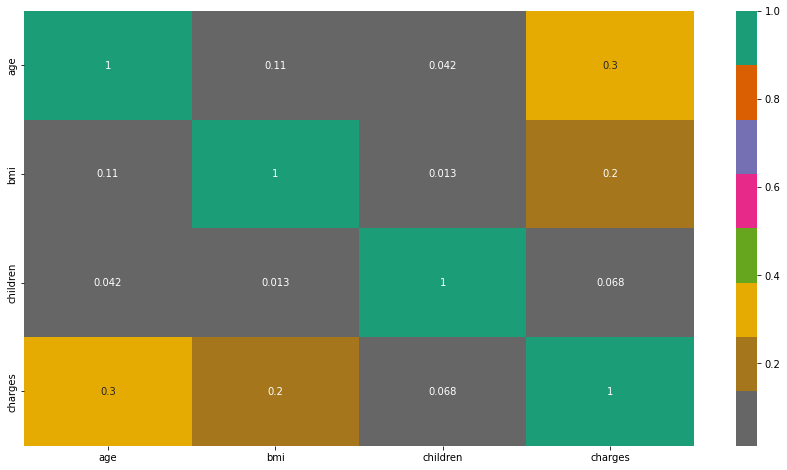

In [12]:

plt.figure(figsize = (15,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Dark2_r')



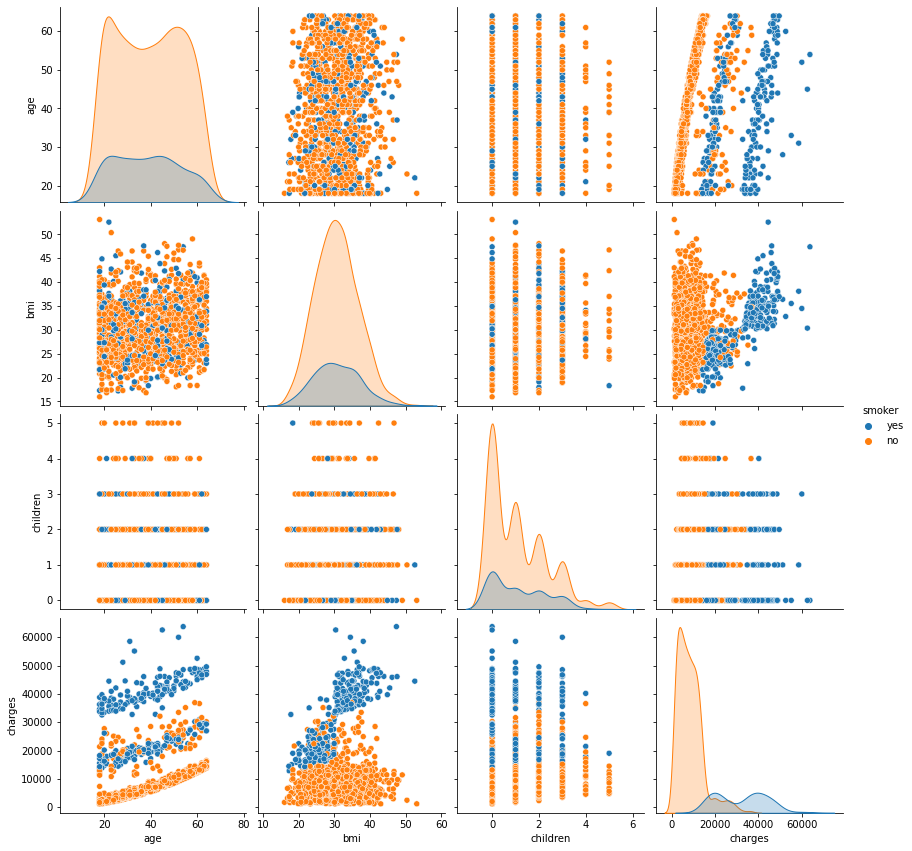

In [13]:
sns.pairplot(df, hue='smoker',height=3)

In [14]:
from pycaret.regression import *



In [15]:
#label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df
label_encoding(df)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
salud = setup(data = df, target = 'charges',  session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])
             

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [25]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2879.3076,25621857.4035,5046.2424,0.8168,0.4745,0.3485,0.0300
llar,Lasso Least Angle Regression,3204.9707,25995010.5289,5084.2557,0.8165,0.4661,0.3431,0.0050
omp,Orthogonal Matching Pursuit,3167.1362,26343745.1791,5110.6374,0.8158,0.4267,0.3217,0.0040
br,Bayesian Ridge,3239.1070,26157676.2674,5100.7273,0.8151,0.4894,0.3484,0.0050
ridge,Ridge Regression,3236.9933,26221696.0000,5106.8398,0.8147,0.4720,0.3485,0.0050
lasso,Lasso Regression,3236.6294,26363089.6000,5120.5567,0.8138,0.4759,0.3486,0.1190
lr,Linear Regression,3253.8430,26542709.2000,5138.2493,0.8124,0.4723,0.3504,0.2780
catboost,CatBoost Regressor,2949.5502,26645181.7526,5141.9531,0.8094,0.4826,0.3565,2.6860
lightgbm,Light Gradient Boosting Machine,3066.4031,26755375.5700,5161.6619,0.8075,0.5467,0.3728,0.0210
rf,Random Forest Regressor,2883.1286,26961597.8056,5175.7208,0.8066,0.4948,0.3662,0.0910


In [18]:
GradientBoostingRegressor = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3106.0944,25602579.1209,5059.8991,0.8471,0.5101,0.4232
1,3175.6097,34013273.1743,5832.0899,0.8022,0.4614,0.3006
2,2838.2301,26050026.9124,5103.9227,0.6702,0.5565,0.4079
3,3024.1258,23577699.6946,4855.6874,0.8031,0.5188,0.4355
4,2980.6140,27093723.3182,5205.1631,0.7985,0.5050,0.3389
5,2877.7886,22762424.2974,4770.9982,0.8536,0.3898,0.2691
6,2513.6961,21093767.8100,4592.7952,0.8565,0.3579,0.2672
7,2842.8769,28826460.4408,5369.0279,0.8415,0.4707,0.2728
8,2454.7302,19184098.2758,4379.9656,0.8761,0.4019,0.3171


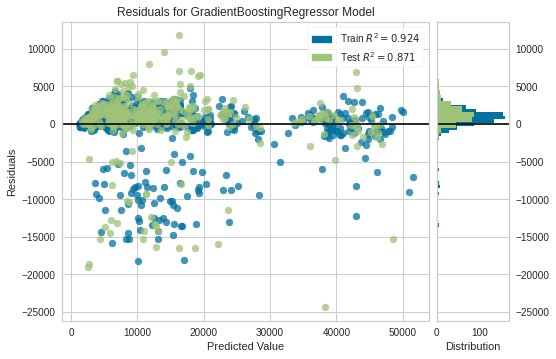

In [19]:
plot_model(GradientBoostingRegressor)


In [20]:
tuned_gbr = tune_model(GradientBoostingRegressor)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3402.9052,29059320.0010,5390.6697,0.8264,0.5269,0.4522
1,3414.8991,35601828.0169,5966.7267,0.7930,0.4927,0.3796
2,3446.2770,33550463.0068,5792.2762,0.5752,0.7047,0.4970
3,3417.3564,28420054.9760,5331.0463,0.7627,0.6743,0.5619
4,3800.4155,39960586.5895,6321.4386,0.7028,0.5988,0.4738
5,3191.9447,25472616.3432,5047.0404,0.8361,0.4449,0.3366
6,3051.5733,28361667.7176,5325.5674,0.8070,0.8618,0.3708
7,3095.1025,29041769.2527,5389.0416,0.8403,0.5316,0.3236
8,3101.0577,24551333.9484,4954.9303,0.8414,0.4833,0.4242


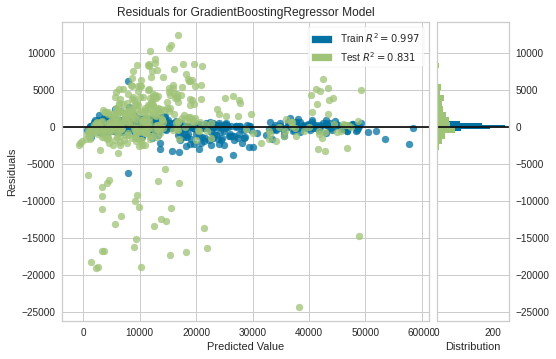

In [21]:
plot_model(tuned_gbr)

In [38]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3068.6789,24204758.9676,4919.8332,0.8306,0.5597,0.4257


,bmi_Power2,age_Power2,sex_0,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,...,region_2_multiply_bmi_Power2,age_Power2_multiply_bmi_5.0,age_Power2_multiply_smoker_0,smoker_0_multiply_children_0,age_Power2_multiply_bmi_Power2,smoker_0_multiply_age_Power2,smoker_0_multiply_bmi_Power2,sex_0_multiply_bmi_Power2,charges,Label
0,2.259463,0.597312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2.259463,0.0,0.597312,0.0,1.349604,0.597312,2.259463,2.259463,9800.888672,6170.236194
1,1.120715,-0.624317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,-0.0,-0.624317,0.0,-0.699682,-0.624317,1.120715,0.000000,4667.607422,7811.114473
2,0.034522,-0.886031,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.0,-0.000000,0.0,-0.030588,-0.000000,0.000000,0.034522,34838.871094,35883.650229
3,-1.040384,-0.445997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.0,-0.445997,0.0,0.464008,-0.445997,-1.040384,-0.000000,5125.215820,7425.725931
4,-0.826600,1.661025,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.826600,0.0,1.661025,1.0,-1.373003,1.661025,-0.826600,-0.000000,12142.578125,16541.785103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-0.930567,-0.113309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.930567,-0.0,-0.113309,0.0,0.105442,-0.113309,-0.930567,-0.000000,6593.508301,10657.177167
398,1.776645,-1.212509,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,-0.0,-1.212509,1.0,-2.154197,-1.212509,1.776645,1.776645,1759.338013,2254.406922
399,-0.221438,-1.021768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.0,-0.000000,0.0,0.226258,-0.000000,-0.000000,-0.000000,18648.421875,19815.247349
400,-0.191160,-0.383008,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.0,-0.383008,1.0,0.073216,-0.383008,-0.191160,-0.191160,5272.175781,4895.809193


In [40]:
save_model(tuned_gbr, "salud_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                          